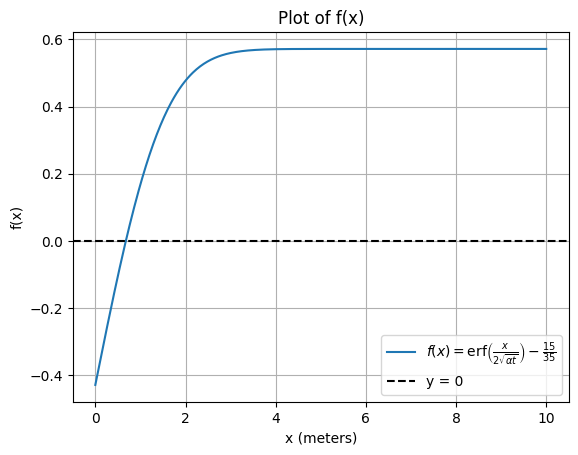

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf

# Given constants
Ti = 20  # initial temperature in Celsius
Ts = -15  # surface temperature in Celsius
alpha = 0.138e-6  # thermal conductivity in meters^2 per second
t = 60 * 24 * 3600  # 60 days in seconds
fraction = 15 / 35  # the target value for the root-finding

# Define the function f(x)
def f(x):
    return erf(x / (2 * np.sqrt(alpha * t))) - fraction

# Define the range for x
x_values = np.linspace(0, 10, 500)  # Choosing a range for x

# Compute the function values
f_values = f(x_values)

# Plot the function
plt.plot(x_values, f_values, label=r'$f(x) = \mathrm{erf}\left(\frac{x}{2\sqrt{\alpha t}}\right) - \frac{15}{35}$')
plt.axhline(0, color='black', linestyle='--', label='y = 0')  # horizontal line at y=0
plt.title('Plot of f(x)')
plt.xlabel('x (meters)')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


In [2]:
# Bisection method implementation
def bisection_method(f, a, b, tol=1e-13, max_iterations=1000):
    if f(a) * f(b) > 0:
         print("The function must have different signs at the endpoints a and b.")
    
    iteration = 0
    while (b - a) / 2 > tol and iteration < max_iterations:
        midpoint = (a + b) / 2
        if f(midpoint) == 0:  # Found exact root
            return midpoint
        elif f(a) * f(midpoint) < 0:
            b = midpoint
        else:
            a = midpoint
        iteration += 1
    return (a + b) / 2

# Starting values for the bisection method
a0 = 0  # Lower bound
b0 = 10  # Upper bound (based on plot)
tolerance = 1e-13

# Apply the bisection method to find the approximate depth
approx_depth = bisection_method(f, a0, b0, tol=tolerance)

approx_depth


0.6769618544819167

In [9]:
# Define the derivative of the function f(x) for Newton's method
def f_prime(x):
    return (2 / np.sqrt(np.pi)) * np.exp(- (x / (2 * np.sqrt(alpha * t)))**2) / (2 * np.sqrt(alpha * t))

# Newton's method implementation
def newtons_method(f, f_prime, x0, tol=1e-13, max_iterations=1000):
    x = x0
    for _ in range(max_iterations):
        f_value = f(x)
        f_derivative = f_prime(x)
        if abs(f_derivative) < 1e-10:  # Avoid division by very small numbers
            return "Derivative is too small; Newton's method may not converge."
        x_new = x - f_value / f_derivative
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    return x

# Starting value for Newton's method
x0 = 0.01  # Starting point

# Apply Newton's method with starting value x0 = 0.01 meters
approx_depth_newton_x0_01 = newtons_method(f, f_prime, x0, tol=1e-13)
approx_depth_newton_x0_01



0.6769618544819366

In [10]:
# Apply Newton's method with starting value x0 = 10 meters (from earlier max bound)
x0_bar = 10  # Upper bound from the earlier bisection plot

approx_depth_newton_x0_bar = newtons_method(f, f_prime, x0_bar, tol=1e-13)


approx_depth_newton_x0_bar

"Derivative is too small; Newton's method may not converge."

In [20]:
# Redefining the function and its derivative
def f(x):
    return np.exp(3 * x) - 27 * x**6 + 27 * x**4 * np.exp(x) - 9 * x**2 * np.exp(2 * x)

def f_prime(x):
    return 3 * np.exp(3 * x) - 162 * x**5 + (108 * x**3 * np.exp(x) + 27 * x**4 * np.exp(x)) - (18 * x * np.exp(2 * x) + 18 * x**2 * np.exp(2 * x))

# Newton's Method
def newtons_method_single_root(f, f_prime, x0, tol=1e-10, max_iter=100):
    x = x0
    for i in range(max_iter):
        f_val = f(x)
        f_deriv = f_prime(x)
        if abs(f_deriv) < 1e-10:  # Avoid division by very small numbers
            return x, i  # Return current guess if derivative is too small
        x_new = x - f_val / f_deriv
        if abs(x_new - x) < tol:  # Check if the solution converged
            return x_new, i
        x = x_new
    return x, max_iter

# Initial guess and interval
x0 = 4.0  # Starting point in the interval (3, 5)
tol = 1e-10
max_iter = 100

# Apply Newton's method
root_newton, iterations = newtons_method_single_root(f, f_prime, x0, tol, max_iter)

root_newton, iterations


(3.7330759927344146, 32)

In [21]:
# Define the function g(x) = f(x) / f'(x)
def g(x):
    return f(x) / f_prime(x)

def g_prime(x):
    f_val = f(x)
    f_prime_val = f_prime(x)
    f_double_prime_val = 9 * np.exp(3 * x) - 810 * x**4 + (324 * x**2 * np.exp(x) + 108 * x**3 * np.exp(x)) - (18 * np.exp(2 * x) + 36 * x * np.exp(2 * x))
    return (f_prime_val * f_prime_val - f_val * f_double_prime_val) / (f_prime_val**2)

# Newton's method for g(x)
def newtons_method_g(f, f_prime, x0, tol=1e-10, max_iter=1000):
    x = x0
    for i in range(max_iter):
        g_val = g(x)
        g_deriv = g_prime(x)
        if abs(g_deriv) < 1e-10:
            return x, i  # Return current guess if derivative is too small
        x_new = x - g_val / g_deriv
        if abs(x_new - x) < tol:
            return x_new, i
        x = x_new
    return x, max_iter
x0=3.7
max_iter =1000
# Apply Newton's method to g(x)
root_newton_g, iterations_g = newtons_method_g(f, f_prime, x0, tol, max_iter)

root_newton_g, iterations_g


(3.717194694582505, 1000)

In [24]:
# Let's verify with the exact setup

# Redefine the fixed-point iteration with the same setup
def fixed_point_iteration_exact(f, f_prime, x0, m=2, tol=1e-10, max_iter=100):
    iterations = 0
    for _ in range(max_iter):
        f_val = f(x0)
        f_deriv = f_prime(x0)
        if abs(f_deriv) < 1e-10:  # Avoid division by very small numbers
            break
        x1 = x0 - m * f_val / f_deriv
        if abs(x1 - x0) < tol:  # Stopping criterion based on tolerance
            break
        x0 = x1
        iterations += 1
    return x1, iterations

# Use the same initial guess and multiplicity
x0_fixed = 3.7  # Starting point
m = 2  # Assumed multiplicity

# Apply the fixed-point iteration
root_fixed_point_exact, iterations_fixed_point_exact = fixed_point_iteration_exact(f, f_prime, x0_fixed, 2, 1e-10, 100)

root_fixed_point_exact, iterations_fixed_point_exact  # Return the root and number of iterations


(3.7330947507730023, 19)

In [26]:
import numpy as np
import pandas as pd

# Define the function and its derivative for Newton's method
def f(x):
    return x**6 - x - 1

def df(x):
    return 6*x**5 - 1

# Newton's method
def newton_method(x0, tol=1e-10, max_iter=20):
    x_values = [x0]
    for _ in range(max_iter):
        x_new = x0 - f(x0) / df(x0)
        x_values.append(x_new)
        if abs(x_new - x0) < tol:
            break
        x0 = x_new
    return x_values

# Secant method
def secant_method(x0, x1, tol=1e-10, max_iter=20):
    x_values = [x0, x1]
    for _ in range(max_iter):
        if abs(f(x1) - f(x0)) < tol:
            break
        x_new = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
        x_values.append(x_new)
        if abs(x_new - x1) < tol:
            break
        x0, x1 = x1, x_new
    return x_values

# Perform Newton's method and Secant method
newton_values = newton_method(2)
secant_values = secant_method(2, 1)

# The true root using a high precision method (for error calculation)
true_root = 1.1347284922  # Approximate largest root

# Calculate errors
newton_errors = [abs(x - true_root) for x in newton_values]
secant_errors = [abs(x - true_root) for x in secant_values]

# Create a table for both methods
iterations = list(range(max(len(newton_errors), len(secant_errors))))
error_table = pd.DataFrame({
    'Iteration': iterations,
    'Newton Error': newton_errors + [np.nan]*(len(iterations) - len(newton_errors)),
    'Secant Error': secant_errors + [np.nan]*(len(iterations) - len(secant_errors))
})

error_table

,Iteration,Newton Error,Secant Error
0,0,0.865272,0.865272
1,1,0.545900,0.134728
2,2,0.296010,0.118599
3,3,0.120242,0.055849
4,4,0.026810,0.017073
5,5,0.001625,0.002197
6,6,0.000002,0.000088
7,7,0.000004,0.000005
8,8,0.000004,0.000004
9,9,NaN,0.000004


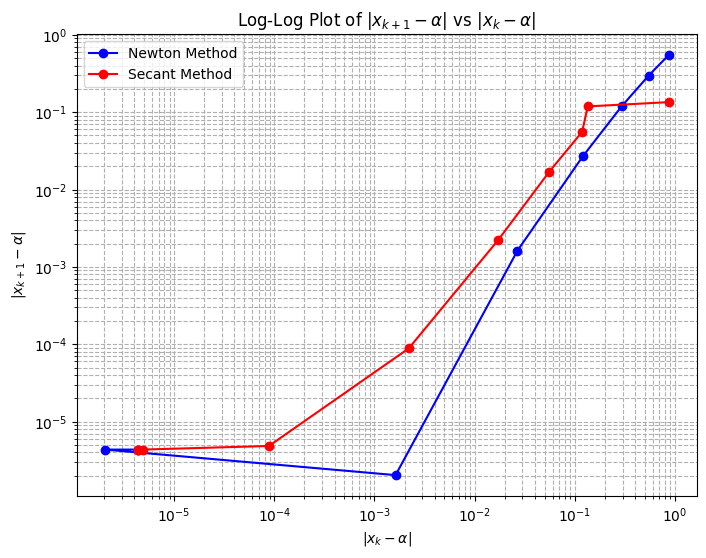

(0.9336708779029685, 0.924766366797249)

In [27]:
import matplotlib.pyplot as plt

# Exact root (α)
alpha = 1.1347284922

# Compute |x_k+1 - α| vs |x_k - α| for both methods
newton_xk = newton_values[:-1]
newton_xk1 = newton_values[1:]
newton_abs_error_k = [abs(x - alpha) for x in newton_xk]
newton_abs_error_k1 = [abs(x - alpha) for x in newton_xk1]

secant_xk = secant_values[:-1]
secant_xk1 = secant_values[1:]
secant_abs_error_k = [abs(x - alpha) for x in secant_xk]
secant_abs_error_k1 = [abs(x - alpha) for x in secant_xk1]

# Plot on log-log axes
plt.figure(figsize=(8, 6))

# Newton method plot
plt.loglog(newton_abs_error_k, newton_abs_error_k1, 'bo-', label="Newton Method")

# Secant method plot
plt.loglog(secant_abs_error_k, secant_abs_error_k1, 'ro-', label="Secant Method")

# Labels and title
plt.xlabel(r'$|x_k - \alpha|$')
plt.ylabel(r'$|x_{k+1} - \alpha|$')
plt.title(r'Log-Log Plot of $|x_{k+1} - \alpha|$ vs $|x_k - \alpha|$')
plt.legend()

plt.grid(True, which="both", ls="--")
plt.show()

# Compute slopes (log differences)
newton_slope = np.polyfit(np.log(newton_abs_error_k), np.log(newton_abs_error_k1), 1)[0]
secant_slope = np.polyfit(np.log(secant_abs_error_k), np.log(secant_abs_error_k1), 1)[0]

newton_slope, secant_slope
